# Examine the correlation between consistency and importance pattern similarity

In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math
import scipy
import random
from tqdm import tqdm

from experiments.causal_trace import plot_trace_heatmap, plot_trace_heatmap_from_values, plot_normalized_trace_heatmap_from_values

In [2]:
#query_file = "/cephyr/users/lovhag/Alvis/projects/rome/data/P19_gpt2_xl_preds.jsonl"
#results_folder = "/cephyr/users/lovhag/Alvis/projects/rome/data/results/gpt2-xl/P19/causal_trace_pararel_1711765_1815989"

#query_file = "/cephyr/users/lovhag/Alvis/projects/rome/data/P20_gpt2_xl_preds.jsonl"
#results_folder = "/cephyr/users/lovhag/Alvis/projects/rome/data/results/gpt2-xl/P20/causal_trace_pararel_1906409"

#query_file = "/cephyr/users/lovhag/Alvis/projects/rome/data/P101_gpt2_xl_preds.jsonl"
#results_folder = "/cephyr/users/lovhag/Alvis/projects/rome/data/results/gpt2-xl/P101/causal_trace_pararel_1883947_P101"

query_file = "/cephyr/users/lovhag/Alvis/projects/rome/data/P740_gpt2_xl_preds.jsonl"
results_folder = "/cephyr/users/lovhag/Alvis/projects/rome/data/results/gpt2-xl/P740/causal_trace_pararel_1883935_P740"

In [3]:
queries = pd.DataFrame()
with open(query_file) as f:
    for line in f:
        queries = queries.append(json.loads(line), ignore_index=True)
        
queries

,attribute,candidate_p,candidate_prediction,candidate_rank,gold_p,gold_rank,known_id,prediction,prediction_p,prompt,relation_id,subject,template,top10_tokens,top10_tokens_probs
0,Baltimore,0.003734,London,61.0,0.000524,137.0,0.0,2009,0.044686,Pianos Become the Teeth was founded in,P740,Pianos Become the Teeth,{} was founded in,"[ 2009, the, 2008, 2010, 2012, 2011, 200...","[0.04468616098165512, 0.03953692317008972, 0.0..."
1,Baltimore,0.005599,London,45.0,0.000931,141.0,1.0,the,0.033474,"Pianos Become the Teeth, founded in",P740,Pianos Become the Teeth,"{}, founded in","[ 2009, the, 2008, 2010, 2012, 2011, 200...","[0.03310932591557503, 0.03347361460328102, 0.0..."
2,Baltimore,0.004885,London,50.0,0.000661,212.0,2.0,the,0.074972,Pianos Become the Teeth that was founded in,P740,Pianos Become the Teeth,{} that was founded in,"[ 2009, the, 2008, 2010, 2012, 2011, 200...","[0.014746577478945255, 0.07497162371873856, 0...."
3,Baltimore,0.005471,London,40.0,0.000792,139.0,3.0,the,0.117202,"Pianos Become the Teeth, that was started in",P740,Pianos Become the Teeth,"{}, that was started in","[ 2009, the, 2008, 2010, 2012, 2011, 200...","[0.032334744930267334, 0.1172015368938446, 0.0..."
4,Baltimore,0.006885,London,34.0,0.000848,126.0,4.0,the,0.088520,Pianos Become the Teeth started in,P740,Pianos Become the Teeth,{} started in,"[ 2009, the, 2008, 2010, 2012, 2011, 200...","[0.03926042839884758, 0.08852040022611618, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11797,Manchester,0.005554,Lebanon,24.0,0.000033,1195.0,11797.0,the,0.309118,"Shirehorses, that originated in",P740,Shirehorses,"{}, that originated in","[ the, 18, 2009, 2007, 2010, 2008, 2005,...","[0.3091176748275757, 0.0003914463159162551, 5...."
11798,Manchester,0.004213,Israel,31.0,0.000023,1554.0,11798.0,the,0.329369,Shirehorses originated in,P740,Shirehorses,{} originated in,"[ the, 18, 2009, 2007, 2010, 2008, 2005,...","[0.3293687105178833, 0.00047303017345257103, 5..."
11799,Manchester,0.002418,England,33.0,0.000112,758.0,11799.0,the,0.328439,Shirehorses formed in,P740,Shirehorses,{} formed in,"[ the, 18, 2009, 2007, 2010, 2008, 2005,...","[0.3284391164779663, 0.005121232010424137, 0.0..."
11800,Manchester,0.002338,London,72.0,0.000217,275.0,11800.0,the,0.095405,Shirehorses was formed in,P740,Shirehorses,{} was formed in,"[ the, 18, 2009, 2007, 2010, 2008, 2005,...","[0.09540490061044693, 0.019046807661652565, 0...."


## Check error case

In [6]:
subject = queries.subject.unique()[447]
subject

'Sunn O)))'

In [7]:
queries[queries.subject==subject]

,attribute,candidate_p,candidate_prediction,candidate_rank,gold_p,gold_rank,known_id,prediction,prediction_p,prompt,relation_id,subject,template,top10_tokens,top10_tokens_probs
6258,Seattle,0.006436,London,43.0,0.000976,107.0,6258.0,the,0.045211,Sunn O))) was founded in,P740,Sunn O))),{} was founded in,"[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.04521077498793602, 0.02563939243555069, 0.0..."
6259,Seattle,0.004005,London,62.0,0.000605,180.0,6259.0,the,0.033121,"Sunn O))), founded in",P740,Sunn O))),"{}, founded in","[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.03312116116285324, 0.020892193540930748, 0...."
6260,Seattle,0.007192,London,35.0,0.000983,116.0,6260.0,the,0.057303,Sunn O))) that was founded in,P740,Sunn O))),{} that was founded in,"[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.05730307474732399, 0.025690333917737007, 0...."
6261,Seattle,0.003554,Japan,59.0,0.000244,238.0,6261.0,the,0.085501,"Sunn O))), that was started in",P740,Sunn O))),"{}, that was started in","[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.08550134301185608, 0.015340164303779602, 0...."
6262,Seattle,0.004259,London,59.0,0.000664,124.0,6262.0,the,0.099305,Sunn O))) started in,P740,Sunn O))),{} started in,"[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.09930450469255447, 0.01862017996609211, 0.0..."
6263,Seattle,0.002894,London,58.0,0.000458,122.0,6263.0,the,0.066298,Sunn O))) was started in,P740,Sunn O))),{} was started in,"[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.06629824638366699, 0.0194519255310297, 0.03..."
6264,Seattle,0.005919,Japan,42.0,0.000147,417.0,6264.0,the,0.146560,"Sunn O))), that was created in",P740,Sunn O))),"{}, that was created in","[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.14656001329421997, 0.014760901220142841, 0...."
6265,Seattle,0.002764,Japan,77.0,0.000199,303.0,6265.0,the,0.075870,"Sunn O))), created in",P740,Sunn O))),"{}, created in","[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.07587011903524399, 0.021448375657200813, 0...."
6266,Seattle,0.002231,London,74.0,0.000365,164.0,6266.0,the,0.079788,Sunn O))) was created in,P740,Sunn O))),{} was created in,"[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.07978842407464981, 0.02681298367679119, 0.0..."
6267,Seattle,0.017499,Japan,3.0,0.000419,277.0,6267.0,the,0.281794,"Sunn O))), that originated in",P740,Sunn O))),"{}, that originated in","[ the, 1994, 2005, 1996, 2003, 2008, 200...","[0.2817942202091217, 0.0016914141597226262, 0...."


In [8]:
sample_ixs = list(queries[queries.subject==subject].index)
lama_ix = sample_ixs[0]
sample_ix = sample_ixs[1]

results = np.load(os.path.join(results_folder, f"cases/{sample_ix}_any_mlp.npz"), allow_pickle=True)
results_lama = np.load(os.path.join(results_folder, f"cases/{lama_ix}_any_mlp.npz"), allow_pickle=True)

In [9]:
dict(results)

{'scores': array([[[0.10122893, 0.00723416, 0.00906862, ..., 0.00745561,
          0.00758298, 0.00610635],
         [0.10134067, 0.00725174, 0.00906826, ..., 0.00746198,
          0.00758268, 0.00611855],
         [0.10110515, 0.00726777, 0.00908955, ..., 0.00747462,
          0.00759827, 0.00613273],
         ...,
         [0.10224003, 0.00718197, 0.00901867, ..., 0.00764894,
          0.00794146, 0.00573175],
         [0.10222536, 0.00718005, 0.00901781, ..., 0.00764653,
          0.00794163, 0.0057297 ],
         [0.102228  , 0.00717882, 0.00901854, ..., 0.00764672,
          0.00794204, 0.00573068]],
 
        [[0.10157555, 0.00777649, 0.0104677 , ..., 0.00950565,
          0.00910364, 0.00609522],
         [0.10279077, 0.0077181 , 0.01040168, ..., 0.00943978,
          0.00903521, 0.00601374],
         [0.10293145, 0.00757142, 0.01020639, ..., 0.00927885,
          0.00886123, 0.00591218],
         ...,
         [0.10192374, 0.00718176, 0.00891283, ..., 0.00761809,
          0.00

In [11]:
dict(results_lama)

{'scores': array([[[0.04603919, 0.0145425 , 0.02322642, ..., 0.02340087,
          0.01927763, 0.01632017],
         [0.04591012, 0.01457431, 0.02327153, ..., 0.02343436,
          0.019307  , 0.01636003],
         [0.04586897, 0.01457184, 0.02329926, ..., 0.02346904,
          0.01935169, 0.01635914],
         ...,
         [0.05834806, 0.01256183, 0.02018242, ..., 0.02077011,
          0.01773719, 0.01312604],
         [0.05835665, 0.01255886, 0.02018157, ..., 0.02076588,
          0.01773759, 0.01312329],
         [0.05834892, 0.01255664, 0.02018283, ..., 0.02076788,
          0.01774026, 0.01312385]],
 
        [[0.05904225, 0.01389925, 0.01898123, ..., 0.02075755,
          0.01641793, 0.01341825],
         [0.05887879, 0.01384611, 0.01911323, ..., 0.02098347,
          0.01659001, 0.01341356],
         [0.05882852, 0.0137932 , 0.01873097, ..., 0.0204361 ,
          0.01614893, 0.01330896],
         ...,
         [0.05841296, 0.01258878, 0.01996658, ..., 0.02065293,
          0.01

## Get similarities and corresponding consistency values for pairwise comparisons between the LAMA template and other templates

The functions below are copied from `analyze_pararel_causal_tracing_results_top10`.

In [4]:
def plot_te_heatmap(results, token_ix, answer):
    te = (results["scores"][:,:,token_ix]-results["low_score"][token_ix])/abs(results["high_score"][token_ix]-results["low_score"][token_ix])
    window = results.get("window", 10)
    kind = str(results["kind"])
    labels = list(results["input_tokens"])
    for i in range(*results["subject_range"]):
        labels[i] = labels[i] + "*"
    bartitle = f"(p**-p*)/(p-p*)"
    plot_normalized_trace_heatmap_from_values(te, -0.5, 1.5, bartitle, kind, window, labels,
                                   savepdf=False, title=f"Impact of restoring MLP for output '{answer.strip()}'", xlabel=None, modelname=None)
    
def get_cos_dist(lama_scores, scores):
    return 1-get_cos_sim(lama_scores, scores)

def get_cos_sim(lama_scores, scores):
    lama_scores = np.nan_to_num(lama_scores/np.linalg.norm(lama_scores, axis=1)[:, np.newaxis])
    scores = np.nan_to_num(scores/np.linalg.norm(scores, axis=1)[:, np.newaxis])
    sim = np.multiply(lama_scores, scores).sum(axis=1)
    return sum(sim)/len(sim)

def get_results_for_token_ix(results, token_ix, answer_for_token):
    results = dict(results)
    results["scores"] = results["scores"][:,:,token_ix]
    results["low_score"] = results["low_score"][token_ix]
    results["high_score"] = results["high_score"][token_ix]
    results["answer"] = answer_for_token #a bit hacky to get the answer as argument
    return results
    
def get_results_for_subject(results):
    # assumes that results already has been filtered by token_id
    results["scores"] = results["scores"][results["subject_range"][0]:results["subject_range"][1],:]
    results["input_tokens"] = results["input_tokens"][results["subject_range"][0]:results["subject_range"][1]]
    results["input_ids"] = results["input_ids"][results["subject_range"][0]:results["subject_range"][1]]
    results["subject_range"] = np.array([0,len(results["input_tokens"])])
    return results

def get_data_entry(sample_ix, lama_ix, queries, candidate=False):
    if not candidate:
        token_ix = 0
        answer = queries.loc[lama_ix]["top10_tokens"][token_ix]
        sample_answer = queries.loc[sample_ix]["prediction"]
    else:
        answer = queries.loc[lama_ix]["candidate_prediction"]
        sample_answer = queries.loc[sample_ix]["candidate_prediction"]
        token_ix = None
        try:
            token_ix = queries.loc[lama_ix]["top10_tokens"].index(answer)
        except: 
            print(f"Warning: Candidate prediction not in top 10 tokens for sample with query index {lama_ix}.")
            print()
            return
            
    results = np.load(os.path.join(results_folder, f"cases/{sample_ix}_any_mlp.npz"), allow_pickle=True)
    results = get_results_for_token_ix(results, token_ix, answer)
    results = get_results_for_subject(results)
    
    results_lama = np.load(os.path.join(results_folder, f"cases/{lama_ix}_any_mlp.npz"), allow_pickle=True)
    results_lama = get_results_for_token_ix(results_lama, token_ix, answer)
    results_lama = get_results_for_subject(results_lama)

    data_entry = {"sample_ix": sample_ix, 
                 "lama_ix": lama_ix,
                 "subject": queries.loc[sample_ix].subject,
                 "lama_template": queries.loc[lama_ix]["template"],
                 "sample_template": queries.loc[sample_ix]["template"],
                 "lama_answer": answer.strip(),
                 "sample_answer": sample_answer,
                 "lama_te": results_lama["high_score"]-results_lama["low_score"],
                 "sample_te": results["high_score"]-results["low_score"],
                 "is_consistent": sample_answer==answer,
                 "pairwise_sim": get_cos_sim(results_lama["scores"], results["scores"]),
                 "pred_type": "candidate" if candidate else "any",
                }
    return data_entry

In [5]:
data = []

for subject in tqdm(queries.subject.unique()[:500]): #random.sample(list(queries.subject.unique()[:200]), 3): #queries.subject.unique()[:200]:
    sample_ixs = list(queries[queries.subject==subject].index)
    lama_ix = sample_ixs[0]
        
    for sample_ix in sample_ixs[1:]:
        data_entry = get_data_entry(sample_ix, lama_ix, queries, candidate=False)
        if data_entry is not None:
            data.append(data_entry)

        data_entry = get_data_entry(sample_ix, lama_ix, queries, candidate=True)
        if data_entry is not None:
            data.append(data_entry)
        
data = pd.DataFrame(data)
data.head()

  0%|          | 2/500 [00:00<00:27, 17.84it/s]

  1%|          | 6/500 [00:00<00:31, 15.78it/s]

  2%|▏         | 10/500 [00:00<00:29, 16.69it/s]

  3%|▎         | 14/500 [00:00<00:30, 15.86it/s]

  3%|▎         | 16/500 [00:00<00:30, 15.89it/s]

  4%|▍         | 22/500 [00:01<00:28, 16.97it/s]

  6%|▌         | 28/500 [00:01<00:30, 15.30it/s]

  6%|▌         | 31/500 [00:01<00:26, 17.41it/s]

  7%|▋         | 37/500 [00:02<00:23, 19.83it/s]

  8%|▊         | 40/500 [00:02<00:22, 20.60it/s]

  9%|▊         | 43/500 [00:02<00:23, 19.71it/s]

 10%|█         | 50/500 [00:02<00:23, 18.84it/s]

 11%|█         | 54/500 [00:03<00:25, 17.72it/s]

 11%|█         | 56/500 [00:03<00:26, 16.88it/s]

 12%|█▏        | 62/500 [00:03<00:23, 18.30it/s]

 13%|█▎        | 65/500 [00:03<00:24, 17.69it/s]

 14%|█▍        | 70/500 [00:03<00:22, 18.76it/s]

 15%|█▌        | 75/500 [00:04<00:24, 17.65it/s]

 16%|█▌        | 79/500 [00:04<00:25, 16.53it/s]

 16%|█▌        | 81/500 [00:04<00:24, 17.25it/s]

 17%|█▋        | 86/500 [00:04<00:24, 17.11it/s]

 18%|█▊        | 90/500 [00:05<00:25, 16.17it/s]

 19%|█▉        | 95/500 [00:05<00:22, 18.30it/s]

 19%|█▉        | 97/500 [00:05<00:23, 16.84it/s]

 20%|██        | 102/500 [00:05<00:22, 17.72it/s]

 21%|██▏       | 107/500 [00:06<00:21, 18.61it/s]

 22%|██▏       | 111/500 [00:06<00:23, 16.31it/s]

 23%|██▎       | 114/500 [00:06<00:23, 16.47it/s]

 24%|██▎       | 118/500 [00:06<00:24, 15.43it/s]

 24%|██▍       | 122/500 [00:07<00:24, 15.25it/s]

 25%|██▌       | 125/500 [00:07<00:21, 17.06it/s]

 26%|██▌       | 131/500 [00:07<00:19, 19.23it/s]

 27%|██▋       | 133/500 [00:07<00:19, 18.41it/s]

 28%|██▊       | 139/500 [00:07<00:18, 19.33it/s]

 28%|██▊       | 142/500 [00:08<00:17, 20.41it/s]

 29%|██▉       | 147/500 [00:08<00:18, 18.76it/s]

 31%|███       | 153/500 [00:08<00:20, 16.68it/s]

 31%|███       | 156/500 [00:08<00:18, 18.69it/s]

 32%|███▏      | 162/500 [00:09<00:17, 19.34it/s]

 33%|███▎      | 166/500 [00:09<00:18, 17.92it/s]

 34%|███▍      | 169/500 [00:09<00:16, 19.48it/s]

 35%|███▍      | 173/500 [00:09<00:18, 17.94it/s]

 35%|███▌      | 177/500 [00:10<00:19, 16.77it/s]

 36%|███▌      | 180/500 [00:10<00:18, 17.28it/s]

 36%|███▋      | 182/500 [00:10<00:18, 16.93it/s]

 38%|███▊      | 188/500 [00:10<00:16, 18.52it/s]

 38%|███▊      | 191/500 [00:10<00:16, 18.25it/s]

 39%|███▉      | 195/500 [00:11<00:19, 15.83it/s]

 40%|███▉      | 198/500 [00:11<00:18, 16.57it/s]

 40%|████      | 201/500 [00:11<00:16, 18.38it/s]

 41%|████      | 206/500 [00:11<00:16, 17.47it/s]

 42%|████▏     | 211/500 [00:12<00:17, 16.41it/s]

 43%|████▎     | 215/500 [00:12<00:18, 15.54it/s]

 43%|████▎     | 217/500 [00:12<00:18, 15.71it/s]

 45%|████▍     | 223/500 [00:12<00:16, 16.81it/s]

 45%|████▌     | 226/500 [00:12<00:14, 18.48it/s]

 46%|████▋     | 232/500 [00:13<00:13, 20.19it/s]

 47%|████▋     | 235/500 [00:13<00:12, 20.94it/s]

 48%|████▊     | 240/500 [00:13<00:14, 17.92it/s]

 49%|████▉     | 244/500 [00:13<00:15, 16.37it/s]

 50%|████▉     | 249/500 [00:14<00:13, 18.40it/s]

 51%|█████     | 254/500 [00:14<00:12, 19.44it/s]

 52%|█████▏    | 258/500 [00:14<00:14, 17.16it/s]

 53%|█████▎    | 265/500 [00:15<00:14, 16.78it/s]

 54%|█████▍    | 271/500 [00:15<00:11, 19.58it/s]

 55%|█████▌    | 277/500 [00:15<00:12, 17.94it/s]

 56%|█████▌    | 279/500 [00:15<00:12, 17.54it/s]

 57%|█████▋    | 284/500 [00:16<00:11, 18.37it/s]

 58%|█████▊    | 289/500 [00:16<00:10, 19.44it/s]

 58%|█████▊    | 292/500 [00:16<00:10, 20.62it/s]

 59%|█████▉    | 295/500 [00:16<00:09, 20.88it/s]

 60%|██████    | 300/500 [00:17<00:11, 17.55it/s]

 61%|██████    | 305/500 [00:17<00:10, 18.37it/s]

 62%|██████▏   | 310/500 [00:17<00:09, 19.69it/s]

 63%|██████▎   | 313/500 [00:17<00:09, 20.36it/s]

 64%|██████▎   | 318/500 [00:17<00:09, 18.24it/s]

 64%|██████▍   | 320/500 [00:18<00:10, 17.64it/s]

 65%|██████▌   | 325/500 [00:18<00:10, 16.25it/s]

 66%|██████▌   | 330/500 [00:18<00:09, 18.05it/s]

 67%|██████▋   | 334/500 [00:18<00:10, 16.05it/s]

 67%|██████▋   | 337/500 [00:19<00:09, 16.73it/s]

 68%|██████▊   | 340/500 [00:19<00:08, 18.29it/s]

 69%|██████▉   | 344/500 [00:19<00:09, 16.97it/s]

 70%|███████   | 350/500 [00:19<00:09, 15.50it/s]

 71%|███████   | 353/500 [00:20<00:08, 17.70it/s]

 72%|███████▏  | 358/500 [00:20<00:08, 16.91it/s]

 73%|███████▎  | 363/500 [00:20<00:07, 17.77it/s]

 73%|███████▎  | 365/500 [00:20<00:08, 16.78it/s]

 74%|███████▍  | 370/500 [00:21<00:07, 17.46it/s]

 75%|███████▍  | 373/500 [00:21<00:07, 17.65it/s]

 75%|███████▌  | 377/500 [00:21<00:07, 16.10it/s]

 76%|███████▋  | 382/500 [00:21<00:07, 16.38it/s]

 77%|███████▋  | 384/500 [00:21<00:07, 16.11it/s]

 77%|███████▋  | 386/500 [00:22<00:07, 15.79it/s]

 79%|███████▉  | 394/500 [00:22<00:05, 18.10it/s]

 79%|███████▉  | 397/500 [00:22<00:05, 19.52it/s]

 81%|████████  | 403/500 [00:22<00:04, 21.07it/s]

 82%|████████▏ | 408/500 [00:23<00:04, 19.39it/s]

 83%|████████▎ | 415/500 [00:23<00:04, 18.20it/s]

 84%|████████▍ | 419/500 [00:23<00:04, 17.34it/s]

 84%|████████▍ | 422/500 [00:24<00:04, 16.91it/s]

 85%|████████▌ | 425/500 [00:24<00:04, 18.51it/s]

 86%|████████▌ | 430/500 [00:24<00:04, 16.60it/s]

 87%|████████▋ | 433/500 [00:24<00:03, 18.08it/s]

 88%|████████▊ | 440/500 [00:25<00:03, 18.05it/s]

 89%|████████▊ | 443/500 [00:25<00:03, 17.61it/s]

 89%|████████▉ | 447/500 [00:25<00:03, 17.37it/s]

 90%|█████████ | 450/500 [00:25<00:02, 17.61it/s]

 91%|█████████ | 453/500 [00:25<00:02, 17.77it/s]

 92%|█████████▏| 460/500 [00:26<00:02, 17.56it/s]

 93%|█████████▎| 463/500 [00:26<00:01, 18.63it/s]

 94%|█████████▍| 469/500 [00:26<00:01, 20.40it/s]

 94%|█████████▍| 472/500 [00:26<00:01, 21.23it/s]

 95%|█████████▌| 475/500 [00:26<00:01, 20.30it/s]

 96%|█████████▌| 480/500 [00:27<00:01, 17.81it/s]

 97%|█████████▋| 484/500 [00:27<00:00, 17.17it/s]

 98%|█████████▊| 489/500 [00:27<00:00, 17.95it/s]

 98%|█████████▊| 492/500 [00:27<00:00, 18.62it/s]

 99%|█████████▉| 496/500 [00:28<00:00, 17.47it/s]

100%|██████████| 500/500 [00:28<00:00, 17.67it/s]


,sample_ix,lama_ix,subject,lama_template,sample_template,lama_answer,sample_answer,lama_te,sample_te,is_consistent,pairwise_sim,pred_type
0,1,0,Akihiko Saito,{} died in,{} died at,a,the,-0.00397,0.007263,False,0.997525,any
1,2,0,Akihiko Saito,{} died in,{} passed away in,a,his,-0.00397,-0.018172,False,0.997386,any
2,3,0,Akihiko Saito,{} died in,{} passed away at,a,the,-0.00397,-0.001728,False,0.997956,any
3,4,0,Akihiko Saito,{} died in,{} expired at,a,the,-0.00397,0.001412,False,0.985926,any
4,5,0,Akihiko Saito,{} died in,{} lost their life at,a,the,-0.00397,-0.000851,False,0.997832,any


**Important step:** Remove forbidden predictions.

To make certain that we are only considering fact recall processes.

In [18]:
forbidden_predictions = ["a", "the"]

print("Removing the following forbidden predictions...")
forbidden_mask = data.lama_answer.isin(forbidden_predictions)
print(data[forbidden_mask].lama_answer.value_counts())

data = data[~(forbidden_mask)].reset_index(drop=True)
data

Removing the following forbidden predictions...
Series([], Name: lama_answer, dtype: int64)


,sample_ix,lama_ix,subject,lama_template,sample_template,lama_answer,sample_answer,lama_te,sample_te,is_consistent,pairwise_sim,pred_type,te_above_thresh
0,33,32,Georgios Roilos,{} died in,{} died at,Athens,Athens,0.010320,-0.017474,True,0.960639,candidate,False
1,34,32,Georgios Roilos,{} died in,{} passed away in,Athens,Athens,0.010320,0.010643,True,0.992906,candidate,True
2,35,32,Georgios Roilos,{} died in,{} passed away at,Athens,Athens,0.010320,-0.000035,True,0.957528,candidate,False
3,36,32,Georgios Roilos,{} died in,{} expired at,Athens,Toronto,0.010320,-0.001983,False,0.922311,candidate,False
4,37,32,Georgios Roilos,{} died in,{} lost their life at,Athens,Athens,0.010320,-0.000485,True,0.964933,candidate,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,3963,3960,Boris Souvarine,{} died in,{} passed away at,Paris,London,0.005462,0.000049,False,0.990288,candidate,True
1732,3964,3960,Boris Souvarine,{} died in,{} expired at,Paris,Barcelona,0.005462,-0.000223,False,0.966071,candidate,False
1733,3965,3960,Boris Souvarine,{} died in,{} lost their life at,Paris,Paris,0.005462,0.000985,True,0.995953,candidate,True
1734,3966,3960,Boris Souvarine,{} died in,{}'s life ended in,Paris,Paris,0.005462,0.001715,True,0.995218,candidate,True


## TE threshold

To ensure that we only measure fact associations for a memory recall process, we restrict our analysis to samples for which perturbing the subject yields a lower probability of the traced object compared to the unperturbed case. I.e. the total effect as defined by Meng et al. is positive.

> We need to be able to show that we can perform causal tracing also for incorrect predictions. What TE threshold was set by the ROME authors? Compare this to our results.

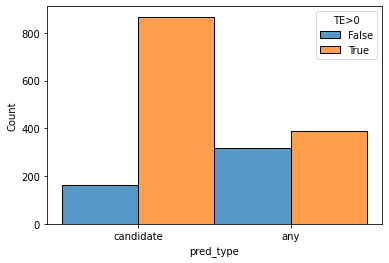

In [19]:
te_thresh = 0
data["te_above_thresh"] = (data.sample_te>te_thresh) & (data.lama_te>te_thresh)
ax = sns.histplot(data=data, x="pred_type", hue="te_above_thresh", multiple="dodge")
ax.get_legend().set_title(f"TE>{te_thresh}")
plt.show()

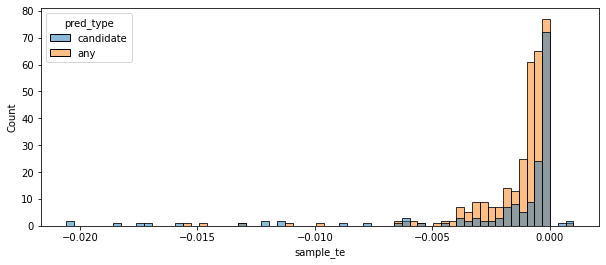

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(data=data[~data["te_above_thresh"]], x="sample_te", hue="pred_type")
plt.show()

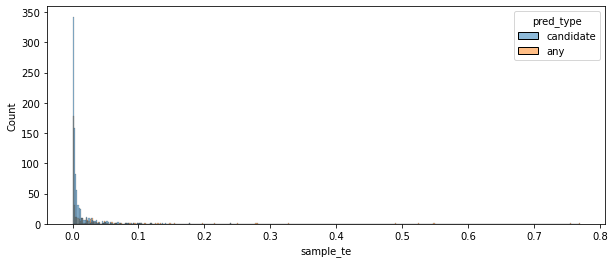

In [21]:
plt.figure(figsize=(10,4))
sns.histplot(data=data[data["te_above_thresh"]], x="sample_te", hue="pred_type")
plt.show()

## Consistency results

In [22]:
data.groupby("pred_type").is_consistent.agg(["mean", "count"])

,mean,count
pred_type,,
any,0.050919,707
candidate,0.797862,1029


In [23]:
data[(data.sample_te>0) & (data.lama_te>0)].groupby("pred_type").is_consistent.agg(["mean", "count"])

,mean,count
pred_type,,
any,0.092308,390
candidate,0.836217,867


## Evaluate RQ1

We should be able to observe a correlation between consistent predictions and consistent fact recall, measured as similarity between extracted factual subject associations. 

We report the Spearman correlation between model consistency and extraction pattern similarity.

Only constant values for threshold 0.14. Stopping...


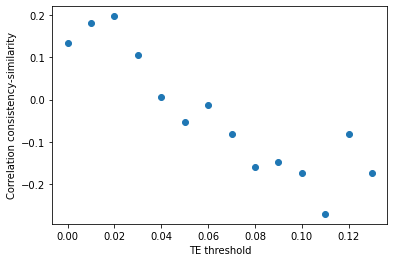

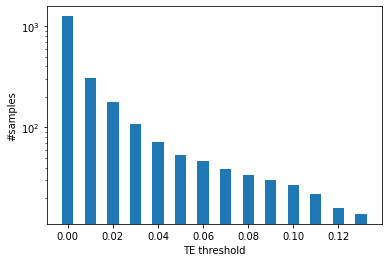

In [24]:
corrs = []
pvalues = []
te_thresholds = np.linspace(0, 0.3, 31)
plot_thresh = []
counts = []

valid_cols = list(data.columns)
valid_cols.remove("pred_type")
nd_data = data.drop_duplicates(subset=valid_cols).copy()

for thresh in te_thresholds:
    nd_data["te_above_thresh"] = (nd_data.sample_te>thresh) & (nd_data.lama_te>thresh)
    
    if len(nd_data[nd_data["te_above_thresh"]].is_consistent.unique()) == 1:
        print(f"Only constant values for threshold {thresh}. Stopping...")
        break
    if len(nd_data[nd_data["te_above_thresh"]]) == 0:
        print(f"No values for threshold {thresh}. Stopping...")
        break
    corr, pvalue = scipy.stats.spearmanr(nd_data[nd_data["te_above_thresh"]].is_consistent, 
                                          nd_data[nd_data["te_above_thresh"]].pairwise_sim)
    corrs.append(corr)
    pvalues.append(pvalue)
    plot_thresh.append(thresh)
    counts.append(sum(nd_data["te_above_thresh"]))
    
plt.scatter(plot_thresh, corrs)
plt.xlabel("TE threshold")
plt.ylabel("Correlation consistency-similarity")
plt.show()

plt.bar(x=plot_thresh, height=counts, width=0.005)
plt.yscale("log")
plt.xlabel("TE threshold")
plt.ylabel("#samples")
plt.show()

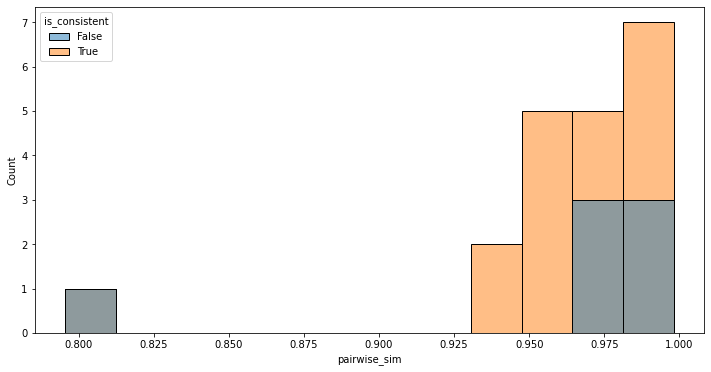

In [25]:
thresh = 0.1
nd_data["te_above_thresh"] = (nd_data.sample_te>thresh) & (nd_data.lama_te>thresh)
plt.figure(figsize=(12,6))
sns.histplot(data=nd_data[nd_data["te_above_thresh"]], x="pairwise_sim", hue="is_consistent")
plt.show()

In [26]:
nd_data[nd_data.te_above_thresh]

,sample_ix,lama_ix,subject,lama_template,sample_template,lama_answer,sample_answer,lama_te,sample_te,is_consistent,pairwise_sim,pred_type,te_above_thresh
9,50,48,Michelangelo,{} died in,{} passed away in,16,16,0.214494,0.251021,True,0.947381,any,True
212,434,432,Umar ibn Al-Khattāb,{} died in,{} passed away in,6,the,0.143021,0.109505,False,0.994711,any,True
366,858,856,Alexander Alexeyevich Gorsky,{} died in,{} passed away in,Moscow,Moscow,0.111333,0.240556,True,0.993195,any,True
429,962,960,Laurence Sterne,{} died in,{} passed away in,16,16,0.217958,0.155491,True,0.955164,any,True
513,1186,1184,Robert Hooke,{} died in,{} passed away in,16,16,0.467407,0.489148,True,0.970453,any,True
551,1230,1224,Rosa Parks,{} died in,{}'s life ended in,jail,a,0.137828,0.102407,False,0.975274,any,True
604,1370,1368,John Dee,{} died in,{} passed away in,16,16,0.492187,0.524469,True,0.967079,any,True
612,1374,1368,John Dee,{} died in,{}'s life ended in,16,16,0.492187,0.126591,True,0.986903,any,True
632,1434,1432,Edward Gibbon Wakefield,{} died in,{} passed away in,17,18,0.156362,0.129748,False,0.972745,any,True
770,1705,1704,Antisthenes,{} died in,{} died at,Athens,the,0.110305,0.117889,False,0.978043,any,True


In [27]:
scipy.stats.spearmanr(nd_data[nd_data["te_above_thresh"]].is_consistent, 
                                          nd_data[nd_data["te_above_thresh"]].pairwise_sim)

SpearmanrResult(correlation=-0.17366548246351204, pvalue=0.3863243933486412)

In [31]:
nd_data[nd_data["te_above_thresh"]][["lama_te", "sample_te"]].agg(["mean", "count"])

,lama_te,sample_te
mean,0.254313,0.249413
count,27.000000,27.000000
